# Scraping Tweets using tweepy

In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import csv
import tweepy
import re

In [45]:
def search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase):
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    api = tweepy.API(auth)
    
    fname = '_'.join(re.findall(r"#(\w+)", hashtag_phrase))

    with open('%s.csv' % (fname), 'a+') as file:

        
        
        w = csv.writer(file)

        w.writerow(['time_id','timestamp', 'tweet_text', 'user_name ','user_id'])#

        for tweet in tweepy.Cursor(api.search, q= hashtag_phrase, \
                                   lang="en", tweet_mode='extended').items(10):
            w.writerow([tweet.id,tweet.created_at, tweet.full_text.replace('\n',' ').encode('utf-8'), tweet.user.screen_name.encode('utf-8'),tweet.user.id])

In [46]:
consumer_key = input('Consumer Key ')
consumer_secret = input('Consumer Secret ')
access_token = input('Access Token ')
access_token_secret = input('Access Token Secret ')

    
hashtag_phrase = input('Hashtag Phrase ')

if __name__ == '__main__':
    search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase)

Consumer Key Nu0d22J2gR6POGe3h0LIp1Mv4
Consumer Secret bkh5MtR1WRLomBlrKWxUMvXao5dAIro4fn23IppxNMXhq8fve1
Access Token 911029333-GopGlS8i69AhZgAVQcPYKasaR10r9nZq0lkZwtuk
Access Token Secret xWN0JZmCiHr1yeFAQ1dAnQEtalmNKsqPOYN1g5NrY4q4I
Hashtag Phrase #Altcoin


# Import Important Libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize
import re
from datetime import datetime as dt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from collections import Counter
from PIL import Image

In [2]:
#Read csv files
d1 = pd.read_csv(r'Altcoin.csv')
d2 = pd.read_csv(r'Bitcoin.csv')
d3 = pd.read_csv(r'Coindesk.csv')
d4 = pd.read_csv(r'Cryptocurrency.csv')
d5 = pd.read_csv(r'Gold.csv')
d6 = pd.read_csv(r'APPL.csv')
d7 = pd.read_csv(r'GOOG.csv')
d8 = pd.read_csv(r'YHOO.csv')

In [3]:
d1.head(5)

,tweet_id,timestamp,tweet_text,user_name,user_id
0,1.37E+18,3/3/2021 19:25,"b""What #altcoins do you have your eyes on??.-v...",b'JimDeTar',11613122
1,1.37E+18,3/3/2021 19:25,b'Clorox After this weekly close the only thin...,b'CopTheseDeals',763000000000000000
2,1.37E+18,3/3/2021 19:25,b'Multibuy Which #Altcoins would you Buy now ...,b'TheBeerHawk',704656502
3,1.37E+18,3/3/2021 19:25,b'Sex? No thank you. The stock Altcoin has bee...,b'FadyWaaP',4859479341
4,1.37E+18,3/3/2021 19:25,b'#BondYields are the biggest topic If you ha...,b'seanmeebu',3073665889


In [4]:
d1.shape

(2545, 5)

In [5]:
# Convert timestamp type Object to datetime
d1['timestamp'] = pd.to_datetime(d1['timestamp'], errors='coerce')
d2['timestamp'] = pd.to_datetime(d2['timestamp'], errors='coerce')
d3['timestamp'] = pd.to_datetime(d3['timestamp'], errors='coerce')
d4['timestamp'] = pd.to_datetime(d4['timestamp'], errors='coerce')
d5['timestamp'] = pd.to_datetime(d5['timestamp'], errors='coerce')
d6['timestamp'] = pd.to_datetime(d6['timestamp'], errors='coerce')
d7['timestamp'] = pd.to_datetime(d7['timestamp'], errors='coerce')
d8['timestamp'] = pd.to_datetime(d8['timestamp'], errors='coerce')

In [6]:
#normalizing date in timestamp
d1['timestamp'] = d1['timestamp'].dt.normalize()
d2['timestamp'] = d2['timestamp'].dt.normalize()
d3['timestamp'] = d3['timestamp'].dt.normalize()
d4['timestamp'] = d4['timestamp'].dt.normalize()
d5['timestamp'] = d5['timestamp'].dt.normalize()
d6['timestamp'] = d6['timestamp'].dt.normalize()
d7['timestamp'] = d7['timestamp'].dt.normalize()
d8['timestamp'] = d8['timestamp'].dt.normalize()

In [7]:
#Creating Date column
d1['date'] = d1['timestamp'].dt.date
d2['date'] = d2['timestamp'].dt.date
d3['date'] = d3['timestamp'].dt.date
d4['date'] = d4['timestamp'].dt.date
d5['date'] = d5['timestamp'].dt.date
d6['date'] = d6['timestamp'].dt.date
d7['date'] = d7['timestamp'].dt.date
d8['date'] = d8['timestamp'].dt.date

In [8]:
d1.head(5)

,tweet_id,timestamp,tweet_text,user_name,user_id,date
0,1.37E+18,2021-03-03,"b""What #altcoins do you have your eyes on??.-v...",b'JimDeTar',11613122,2021-03-03
1,1.37E+18,2021-03-03,b'Clorox After this weekly close the only thin...,b'CopTheseDeals',763000000000000000,2021-03-03
2,1.37E+18,2021-03-03,b'Multibuy Which #Altcoins would you Buy now ...,b'TheBeerHawk',704656502,2021-03-03
3,1.37E+18,2021-03-03,b'Sex? No thank you. The stock Altcoin has bee...,b'FadyWaaP',4859479341,2021-03-03
4,1.37E+18,2021-03-03,b'#BondYields are the biggest topic If you ha...,b'seanmeebu',3073665889,2021-03-03


# Removing Duplication

In [9]:
d1 = d1.drop_duplicates()
d2 = d2.drop_duplicates()
d3 = d3.drop_duplicates()
d4 = d4.drop_duplicates()
d5 = d5.drop_duplicates()
d6 = d6.drop_duplicates()
d7 = d7.drop_duplicates()
d8 = d8.drop_duplicates()

In [10]:
d1.shape

(2535, 6)

# Data Cleaning

In [11]:
!pip install tweet-preprocessor

In [12]:
import preprocessor as p

d1['cleaned_text'] = d1['tweet_text'].apply(p.clean)
d2['cleaned_text'] = d2['tweet_text'].apply(p.clean)
d3['cleaned_text'] = d3['tweet_text'].apply(p.clean)
d4['cleaned_text'] = d4['tweet_text'].apply(p.clean)
d5['cleaned_text'] = d5['tweet_text'].apply(p.clean)
d6['cleaned_text'] = d6['tweet_text'].apply(p.clean)
d7['cleaned_text'] = d7['tweet_text'].apply(p.clean)
d8['cleaned_text'] = d8['tweet_text'].apply(p.clean)

In [13]:
d1[['tweet_text', 'cleaned_text']]

,tweet_text,cleaned_text
0,"b""What #altcoins do you have your eyes on??.-v...","b""What do you have your eyes on??.-via Investo..."
1,b'Clorox After this weekly close the only thin...,b'Clorox After this weekly close the only thin...
2,b'Multibuy Which #Altcoins would you Buy now ...,b'Multibuy Which would you Buy now & Why? \xf0...
3,b'Sex? No thank you. The stock Altcoin has bee...,b'Sex? No thank you. The stock Altcoin has bee...
4,b'#BondYields are the biggest topic If you ha...,b' are the biggest topic If you have been in c...
...,...,...
2540,b'@CoinAltcoinCap: Coming in hot with the top ...,b': Coming in hot with the top gainers of the ...
2541,"b'@buydogecoin_: Giving 1,000 $DOGE to 1 rando...",b': Giving $DOGE to random person that RETWEET...
2542,b'@CoinAltcoinCap: Interested in @Binance Smar...,b': Interested in Smart Chain projects? Now yo...
2543,"b'@buydogecoin_: Giving 1,000 $DOGE to 1 rando...",b': Giving $DOGE to random person that RETWEET...


In [14]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation , remove words containing numbers, 
       remove words with length less than 2'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'\b\w{1,1}\b', '', text)
    text = re.sub('(^.{1})', '',text)
    
    return text

round1 = lambda x: clean_text_round1(x)
    

In [15]:
# Let's take a look at the updated text
Altcoin_clean = pd.DataFrame(d1.cleaned_text.apply(round1))
Bitcoin_clean = pd.DataFrame(d2.cleaned_text.apply(round1))
Coindesk_clean = pd.DataFrame(d3.cleaned_text.apply(round1))
Cryptocurrency_clean = pd.DataFrame(d4.cleaned_text.apply(round1))
Gold_clean = pd.DataFrame(d5.cleaned_text.apply(round1))
APPL_clean = pd.DataFrame(d6.cleaned_text.apply(round1))
GOOG_clean = pd.DataFrame(d7.cleaned_text.apply(round1))
YHOO_clean = pd.DataFrame(d8.cleaned_text.apply(round1))

In [16]:
Altcoin_clean

,cleaned_text
0,what do you have your eyes onvia investors bus...
1,clorox after this weekly close the only thing ...
2,multibuy which would you buy now why
3,sex no thank you the stock altcoin has been fu...
4,are the biggest topic if you have been in cryp...
...,...
2540,coming in hot with the top gainers of the week...
2541,giving doge to random person that retweets amp...
2542,interested in smart chain projects now you can...
2543,giving doge to random person that retweets amp...


# Remove Stop Words

In [17]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

Altcoin_clean["text_wo_stop"] = Altcoin_clean["cleaned_text"].apply(lambda text: remove_stopwords(text))
Bitcoin_clean["text_wo_stop"] = Bitcoin_clean["cleaned_text"].apply(lambda text: remove_stopwords(text))
Coindesk_clean["text_wo_stop"] = Coindesk_clean["cleaned_text"].apply(lambda text: remove_stopwords(text))
Cryptocurrency_clean["text_wo_stop"] = Cryptocurrency_clean["cleaned_text"].apply(lambda text: remove_stopwords(text))
Gold_clean["text_wo_stop"] = Gold_clean["cleaned_text"].apply(lambda text: remove_stopwords(text))
APPL_clean["text_wo_stop"] = APPL_clean["cleaned_text"].apply(lambda text: remove_stopwords(text))
GOOG_clean["text_wo_stop"] = GOOG_clean["cleaned_text"].apply(lambda text: remove_stopwords(text))
YHOO_clean["text_wo_stop"] = YHOO_clean["cleaned_text"].apply(lambda text: remove_stopwords(text))

Altcoin_clean.head()

,cleaned_text,text_wo_stop
0,what do you have your eyes onvia investors bus...,eyes onvia investors business daily
1,clorox after this weekly close the only thing ...,clorox weekly close thing say good luck sold a...
2,multibuy which would you buy now why,multibuy would buy
3,sex no thank you the stock altcoin has been fu...,sex thank stock altcoin fucking daily basis
4,are the biggest topic if you have been in cryp...,biggest topic crypto tradinginvesting since ti...


# Data Visualization

In [18]:
from matplotlib import pyplot as plt

## Visualizating tweet_count per day

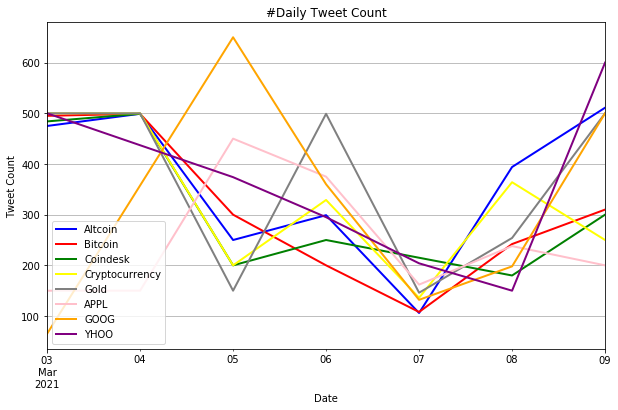

In [19]:
X1 = d1.groupby(pd.Grouper(key='timestamp')).size()
X2 = d2.groupby(pd.Grouper(key='timestamp')).size()
X3 = d3.groupby(pd.Grouper(key='timestamp')).size()
X4 = d4.groupby(pd.Grouper(key='timestamp')).size()
X5 = d5.groupby(pd.Grouper(key='timestamp')).size()
X6 = d6.groupby(pd.Grouper(key='timestamp')).size()
X7 = d7.groupby(pd.Grouper(key='timestamp')).size()
X8 = d8.groupby(pd.Grouper(key='timestamp')).size()
X1.plot(figsize=(10,6), color="blue", linewidth=2.0, label="Altcoin" )
X2.plot(figsize=(10,6), color="red", linewidth=2.0, label="Bitcoin")
X3.plot(figsize=(10,6), color="green", linewidth=2.0, label="Coindesk")
X4.plot(figsize=(10,6), color="yellow", linewidth=2.0, label="Cryptocurrency")
X5.plot(figsize=(10,6), color="grey", linewidth=2.0, label="Gold")
X6.plot(figsize=(10,6), color="pink", linewidth=2.0, label="APPL")
X7.plot(figsize=(10,6), color="orange", linewidth=2.0, label="GOOG")
X8.plot(figsize=(10,6), color="purple", linewidth=2.0, label="YHOO")
plt.ylabel('Tweet Count')
plt.xlabel('Date')
plt.title('#Daily Tweet Count')
plt.legend()
plt.grid()

## Word Cloud for most common words from tweets

In [20]:
#finding most common words for all keywords

Altcoin = Counter(" ".join(str(v) for v in Altcoin_clean['text_wo_stop']).split()).most_common(200)
Bitcoin = Counter(" ".join(str(v) for v in Bitcoin_clean['text_wo_stop']).split()).most_common(200)
Coindesk = Counter(" ".join(str(v) for v in Coindesk_clean['text_wo_stop']).split()).most_common(200)
Cryptocurrency = Counter(" ".join(str(v) for v in Cryptocurrency_clean['text_wo_stop']).split()).most_common(200)
Gold = Counter(" ".join(str(v) for v in Gold_clean['text_wo_stop']).split()).most_common(200)
APPL = Counter(" ".join(str(v) for v in APPL_clean['text_wo_stop']).split()).most_common(200)
GOOG = Counter(" ".join(str(v) for v in GOOG_clean['text_wo_stop']).split()).most_common(200)
YHOO = Counter(" ".join(str(v) for v in YHOO_clean['text_wo_stop']).split()).most_common(200)


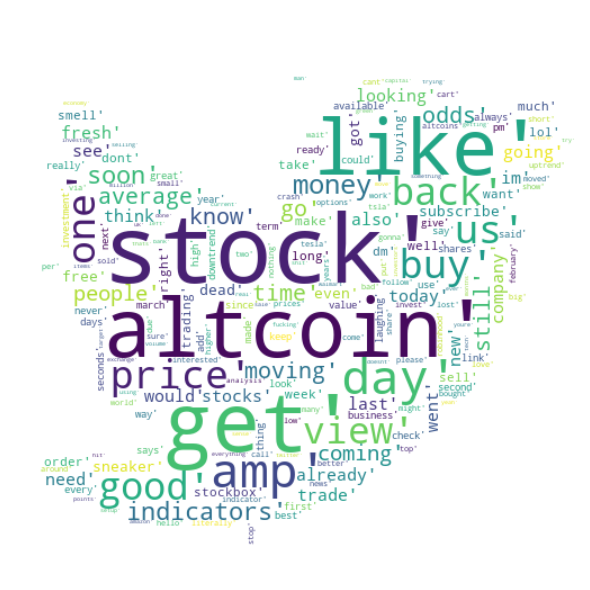

In [115]:
a = np.array(Image.open('img.jpg'))

Altcoin_wordcloud = WordCloud(background_color='white', random_state=42, mask = a).generate(str(Altcoin))
Bitcoin_wordcloud = WordCloud(background_color='black', random_state=42).generate(str(Bitcoin))
Coindesk_wordcloud = WordCloud(background_color='white', random_state=42).generate(str(Coindesk))
Cryptocurrency_wordcloud = WordCloud(background_color='white', random_state=42).generate(str(Cryptocurrency))
Gold_wordcloud = WordCloud(background_color='white', random_state=42).generate(str(Gold))
APPL_wordcloud = WordCloud(background_color='white', random_state=42).generate(str(APPL))
GOOG_wordcloud = WordCloud(background_color='white', random_state=42).generate(str(GOOG))
YHOO_wordcloud = WordCloud(background_color='white', random_state=42).generate(str(YHOO))


# Display the generated image for Altcoin:

plt.figure(figsize=(10,8))
plt.imshow(Altcoin_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Bar Subplot for Weekly tweets

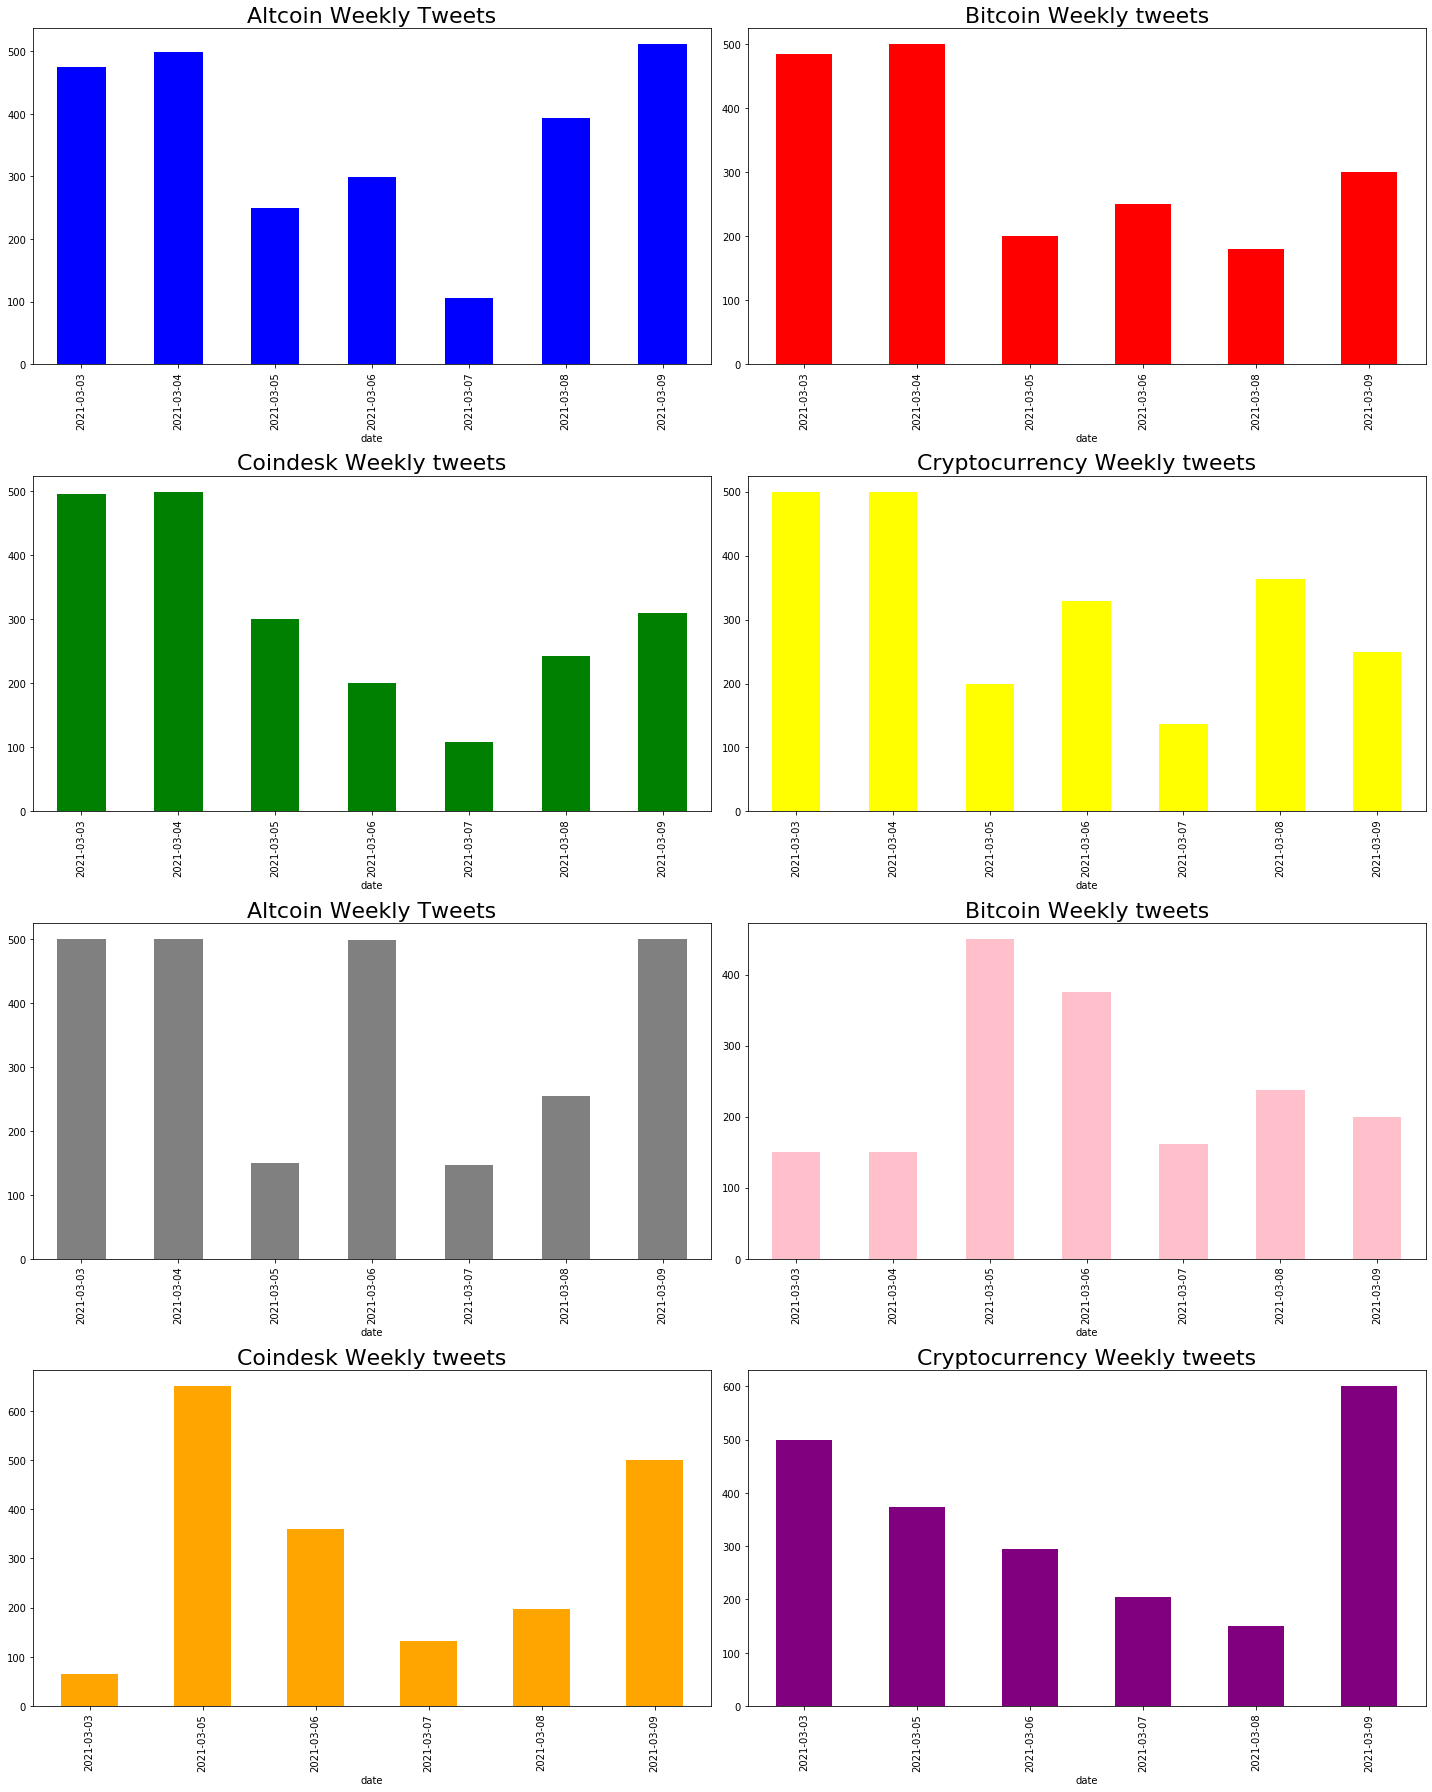

In [116]:

fig, axarr = plt.subplots(4, 2 , figsize=(20,25))

X1 = d1.groupby(pd.Grouper(key='date')).size().plot(kind='bar',color='blue', ax=axarr[0][0])
axarr[0][0].set_title("Altcoin Weekly Tweets", fontsize=22)
X2 = d3.groupby(pd.Grouper(key='date')).size().plot(kind='bar',color='red', ax=axarr[0][1])
axarr[0][1].set_title("Bitcoin Weekly tweets", fontsize=22)
X3 = d2.groupby(pd.Grouper(key='date')).size().plot(kind='bar',color='green', ax=axarr[1][0])
axarr[1][0].set_title("Coindesk Weekly tweets", fontsize=22)
X4 = d4.groupby(pd.Grouper(key='date')).size().plot(kind='bar',color='yellow', ax=axarr[1][1])
axarr[1][1].set_title("Cryptocurrency Weekly tweets", fontsize=22)
X5 = d5.groupby(pd.Grouper(key='date')).size().plot(kind='bar',color='grey', ax=axarr[2][0])
axarr[2][0].set_title("Altcoin Weekly Tweets", fontsize=22)
X6 = d6.groupby(pd.Grouper(key='date')).size().plot(kind='bar',color='pink', ax=axarr[2][1])
axarr[2][1].set_title("Bitcoin Weekly tweets", fontsize=22)
X7 = d7.groupby(pd.Grouper(key='date')).size().plot(kind='bar',color='orange', ax=axarr[3][0])
axarr[3][0].set_title("Coindesk Weekly tweets", fontsize=22)
X8 = d8.groupby(pd.Grouper(key='date')).size().plot(kind='bar',color='purple', ax=axarr[3][1])
axarr[3][1].set_title("Cryptocurrency Weekly tweets", fontsize=22)
fig.tight_layout()
